## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Exercises Datasets"
COLAB = 'google.colab' in sys.modules

DEBUG = False
SEED = 666

In [2]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Load

Escolha alguns datasets, à seu critério, para trabalhar.

In [4]:
df1 = pd.read_pickle(f"{ROOT}/data/spiral2.pickle")
df2 = pd.read_pickle(f"{ROOT}/data/spiral.pickle")
df3 = pd.read_pickle(f"{ROOT}/data/face.pickle")

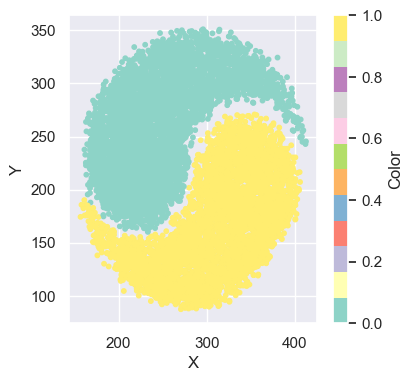

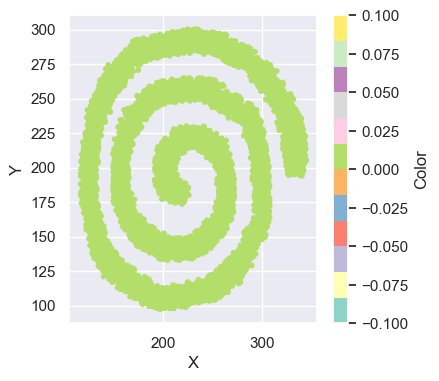

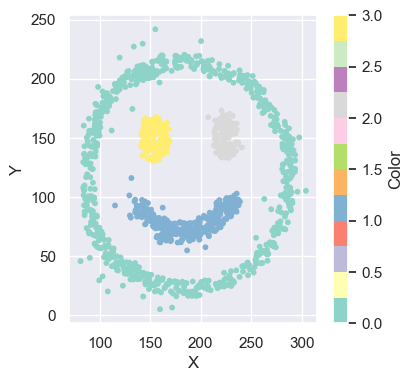

In [5]:
plt.figure(figsize=(4, 4))
plt.scatter(df1['x'], df1['y'], c=df1['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df2['x'], df2['y'], c=df2['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df3['x'], df3['y'], c=df3['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

## Pre-Processing

In [6]:
df1_kmeans = df1.copy()
df2_kmeans = df2.copy()
df3_kmeans = df3.copy()

In [7]:
df1_kmeans.drop(['color'], axis = 1, inplace =True)
df2_kmeans.drop(['color'], axis = 1, inplace =True)
df3_kmeans.drop(['color'], axis = 1, inplace =True)

## Elbow

Nesses datasets nós já temos os Clusters ideais, então fica facultativo usar o Elbow ou outro método para definição do K.

Você pode contar quantas cores/clusters o dataset possui. 

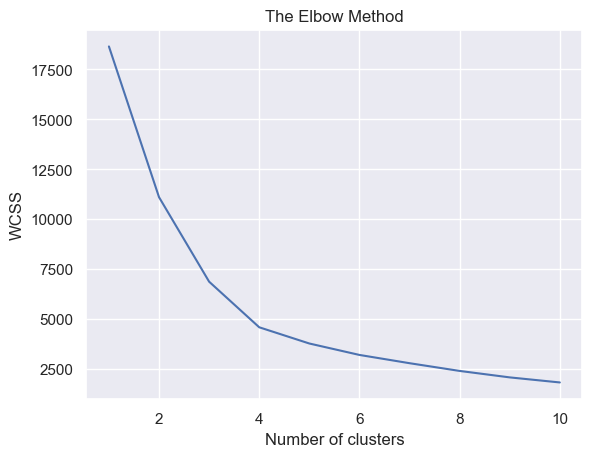

In [10]:
from sklearn.preprocessing import StandardScaler


X= np.asarray(df1_kmeans)
Y= np.asarray(df2_kmeans)
Z= np.asarray(df3_kmeans)

scale = StandardScaler()
X = scale.fit_transform(X)
X.shape
Y = scale.fit_transform(Y)
Y.shape
Z = scale.fit_transform(Z)
Z.shape





from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

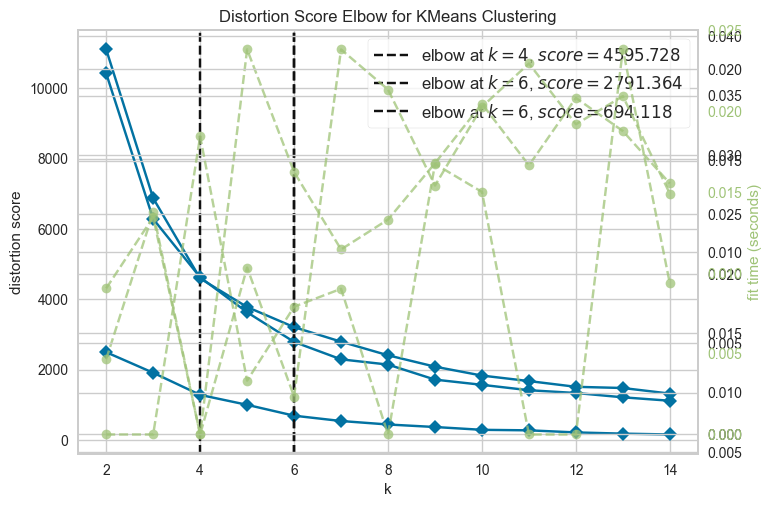

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.fit(Y)
visualizer.fit(Z)
visualizer.show()        # Finalize and render figure

## Models

Vimos em aula o Kmeans

Tente também implementar os outros metodos e compare os resultados fazendo o plot do df_original (com as cores dos clusters ideais) e ao lado o plot com os clusters dos modelos

In [18]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


In [22]:
kmean= KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmean.fit(X)
labels=kmean.labels_


clusters_labels = pd.DataFrame({'cluster':labels})
clusters_labels.head(3)



,cluster
0,4
1,2
2,3


In [27]:
clusters1=pd.concat([df1_kmeans,clusters_labels], axis=1)
clusters1.head()

,x,y,cluster
0,281.762010,186.024837,4
1,212.503675,199.031585,2
2,180.014895,259.379060,3
3,302.372404,284.465182,1
4,328.759727,176.945518,0


In [28]:
clusters2=pd.concat([df2_kmeans,clusters_labels], axis=1)
clusters2.head()

,x,y,cluster
0,323.857377,225.428102,4
1,146.978425,257.287542,2
2,261.374770,253.624468,3
3,157.372865,162.127028,1
4,118.678976,188.888146,0


In [29]:
clusters3=pd.concat([df3_kmeans,clusters_labels], axis=1)
clusters3.head()

,Unnamed: 0.1,x,y,cluster
0,1087.0,230.378162,141.270406,4
1,464.0,281.264318,127.419565,2
2,1237.0,157.530566,158.890252,3
3,68.0,107.354057,175.958260,1
4,1151.0,148.118641,161.809148,0


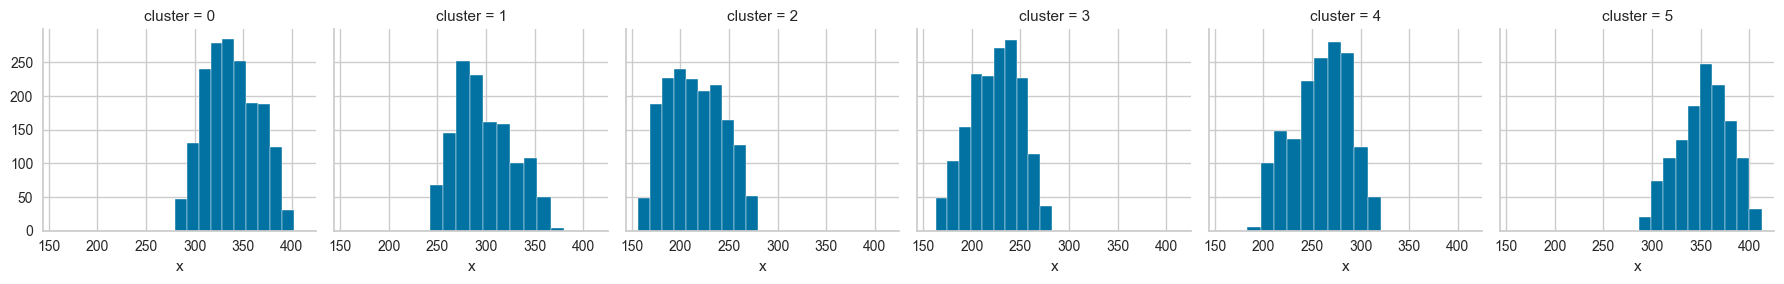

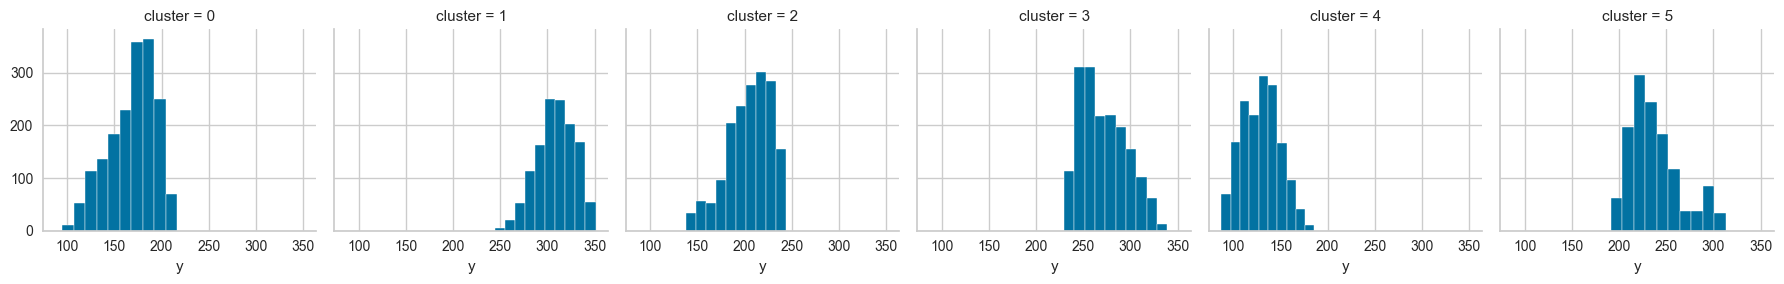

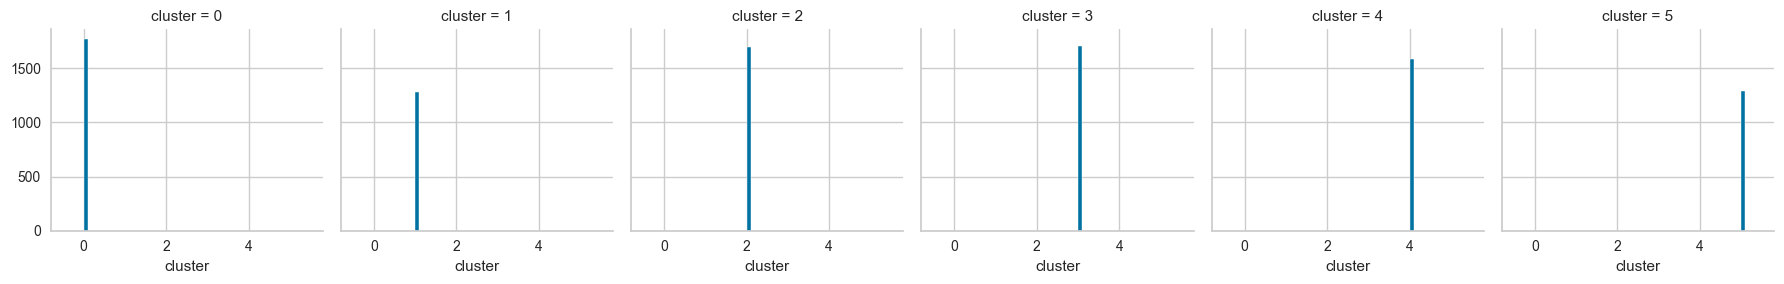

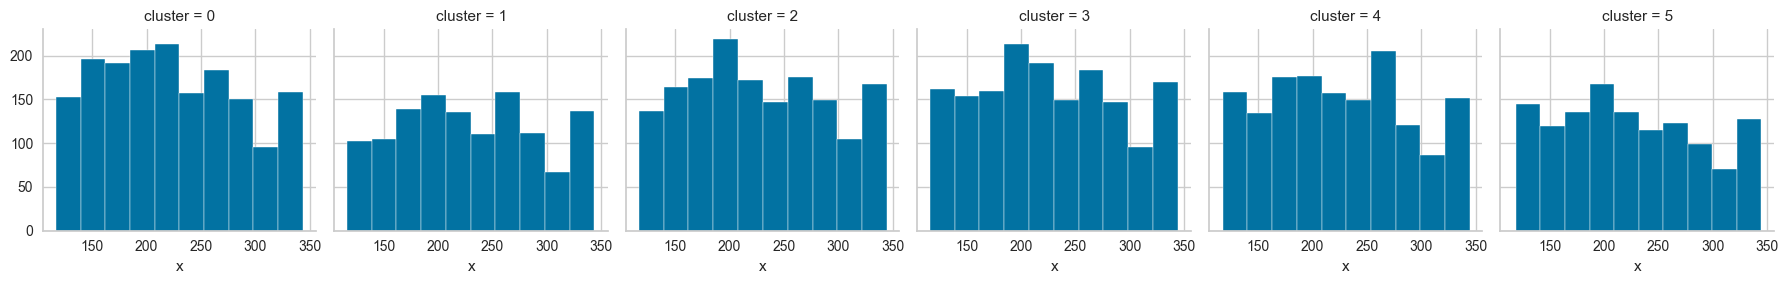

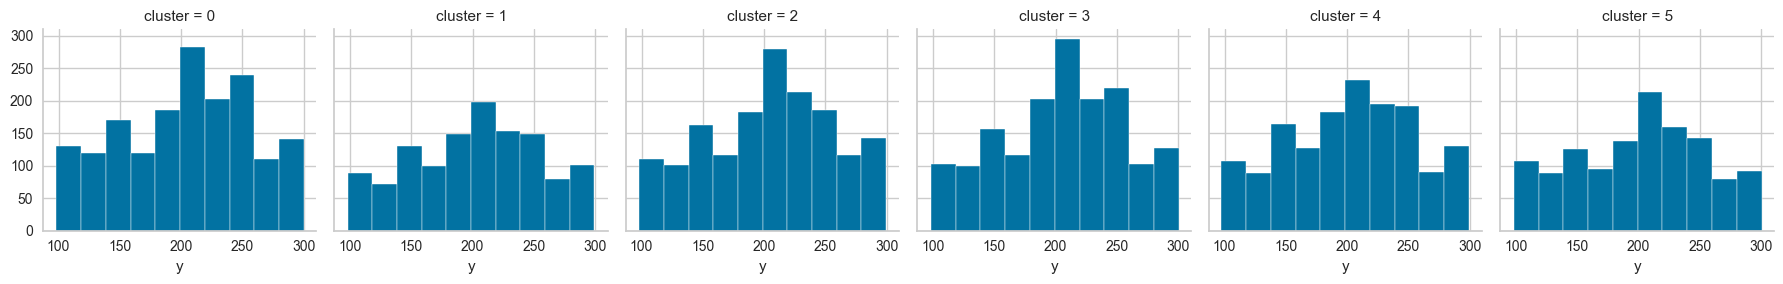

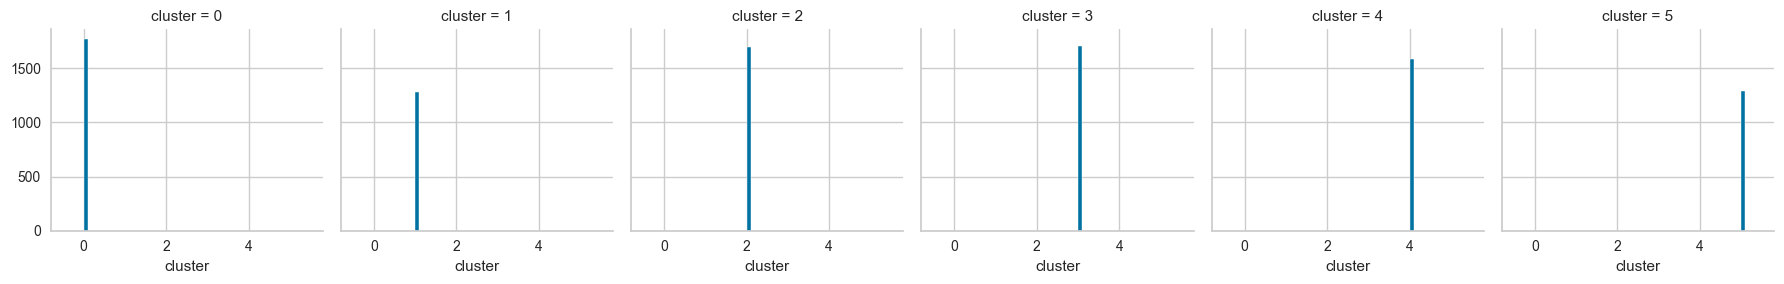

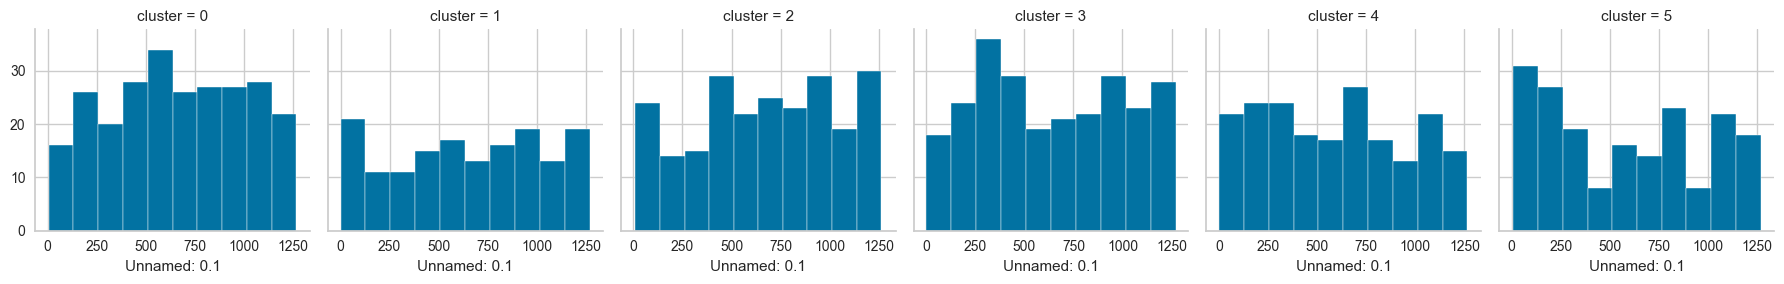

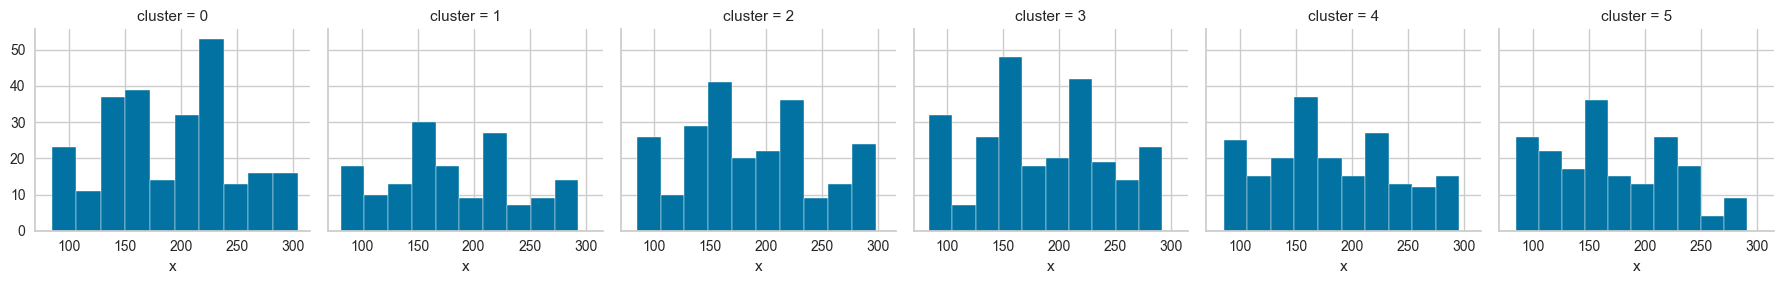

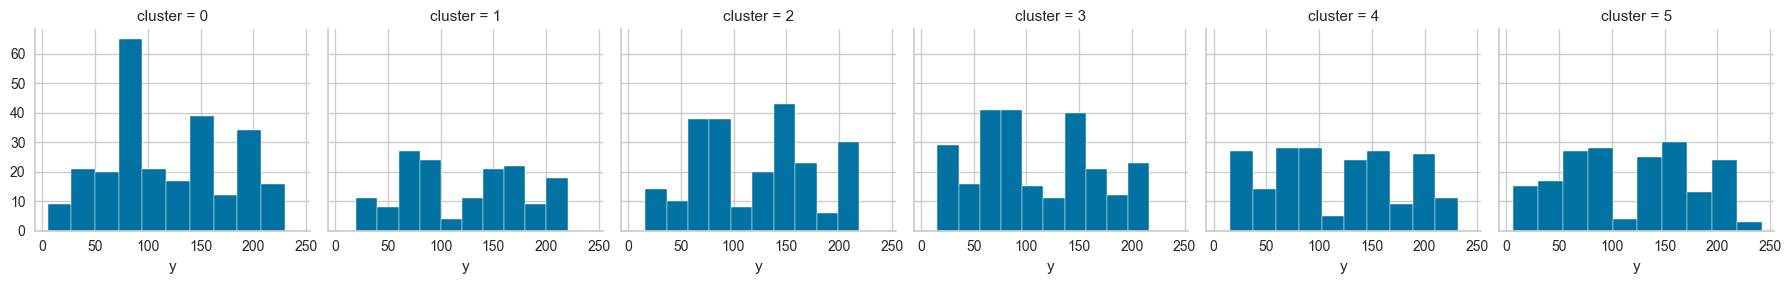

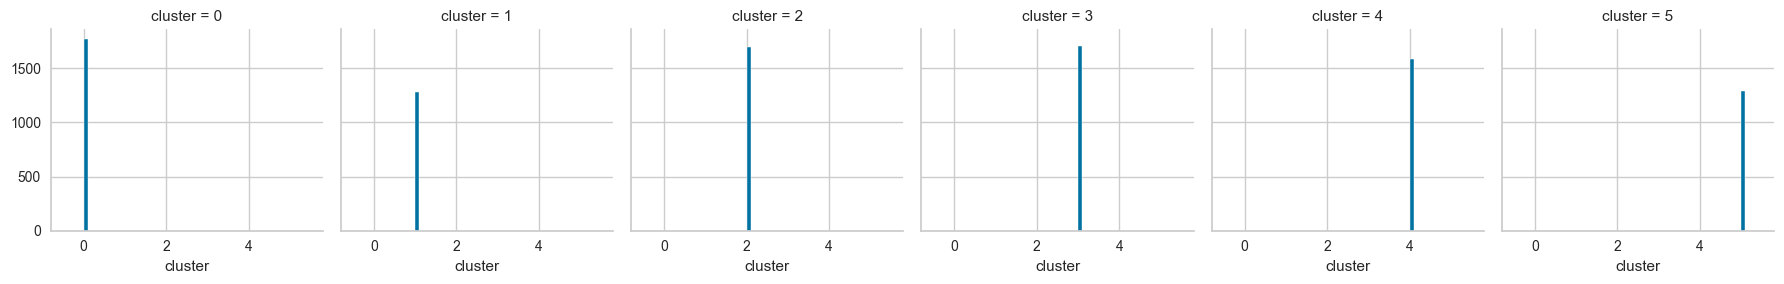

In [31]:
import warnings
warnings.filterwarnings(action="ignore")

for c in clusters1:
    grid= sns.FacetGrid(clusters1, col='cluster')
    grid.map(plt.hist, c)

for c in clusters2:
    grid= sns.FacetGrid(clusters2, col='cluster')
    grid.map(plt.hist, c)


for c in clusters3:
    grid= sns.FacetGrid(clusters3, col='cluster')
    grid.map(plt.hist, c)

## Results

Comente sobre a performance das diferentes técnicas

### Qual é o propósito principal de usar técnicas de clustering em aprendizado de máquina?

O principal objetivo do clustering é encontrar padrões e estruturas naturais em conjuntos de dados não rotulados. Ao agrupar os dados com base em similaridades, o clustering pode revelar informações valiosas sobre a natureza dos dados e as relações entre eles.

### Quais são algumas das métricas comuns usadas para avaliar a qualidade de um cluster?


Os algoritmos de clustering geralmente usam medidas de similaridade, como distância euclidiana, para determinar a proximidade entre pontos de dados. Essas medidas são essenciais para calcular a similaridade entre os pontos e agrupá-los em clusters com base nessas distâncias.

### Como você decide o número ideal de clusters a serem usados em um determinado conjunto de dados?

A avaliação dos resultados do clustering pode ser desafiadora, pois não há uma métrica definitiva para medir sua eficácia. A interpretação dos clusters é muitas vezes subjetiva e dependente do contexto do problema. Visualizações, como gráficos de dispersão ou dendrogramas, podem ser úteis para entender a estrutura dos clusters.

https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study#2.-Set-up